In [5]:
!pwd

/home/peisheng/SDCoT/ground_truth_object_results/sela_loss_nms_investigation


# Generate csv files containing the spatial zone index for each bounding box in each scene

In [2]:
import os
import pandas as pd
import sys

from analyze_spatialzones import get_all_zone_mappings


def get_spatial_zone(row, spatial_zones):
    return spatial_zones.get(row['scan_name'], None).get(row['gt_bbox_index'], None)[1]

val_zone_mappings = get_all_zone_mappings(n=4, dataset_type="val")

'''
for filename in os.listdir('.'):
    print(filename)
    if filename.endswith('.csv'):
        df = pd.read_csv(filename)
        
        # Add the spatial_zone column
        df['spatial_zone'] = df.apply(lambda x: get_spatial_zone(x, val_zone_mappings), axis=1)
        df.to_csv(filename.split(".csv")[0]+"_spatialzones.csv", index=False)
        
'''

df = pd.read_csv("gt_df_results_2024-09-23 14:34:34.219040_18classes_sela_loss_and_new_nms_gamma0.1.csv")
df['spatial_zone'] = df.apply(lambda x: get_spatial_zone(x, val_zone_mappings), axis=1)
df.to_csv("gt_df_results_2024-09-23 14:34:34.219040_18classes_sela_loss_and_new_nms_gamma0.1_spatialzones.csv", index=False)

scene0011_00
scene0011_01


scene0015_00
scene0019_00
scene0019_01
scene0025_00
scene0025_01
scene0025_02
scene0030_00
scene0030_01
scene0030_02
scene0046_00
scene0046_01
scene0046_02
scene0050_00
scene0050_01
scene0050_02
scene0063_00
scene0064_00
scene0064_01
scene0077_00
scene0077_01
scene0081_00
scene0081_01
scene0081_02
scene0084_00
scene0084_01
scene0084_02
scene0086_00
scene0086_01
scene0086_02
scene0088_00
scene0088_01
scene0088_02
scene0088_03
scene0095_00
scene0095_01
scene0100_00
scene0100_01
scene0100_02
scene0131_00
scene0131_01
scene0131_02
scene0139_00
scene0144_00
scene0144_01
scene0146_00
scene0146_01
scene0146_02
scene0149_00
scene0153_00
scene0153_01
scene0164_00
scene0164_01
scene0164_02
scene0164_03
scene0169_00
scene0169_01
scene0187_00
scene0187_01
scene0193_00
scene0193_01
scene0196_00
scene0203_00
scene0203_01
scene0203_02
scene0207_00
scene0207_01
scene0207_02
scene0208_00
scene0217_00
scene0221_00
scene0221_01
scene0222_00
scene0222_01
scene0231_00
scene0231_01
scene0231_02
scene0246_00

# Spatial Zones-Performance Analysis for:

## Baseline Model:

In [1]:
from analyze_spatialzones import analyze_spatial_bias_df

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
Training classes: ['bathtub', 'bed', 'bookshelf', 'cabinet', 'chair', 'counter', 'curtain', 'desk', 'door', 'otherfurniture', 'picture', 'refrigerator', 'showercurtain', 'sink', 'sofa', 'table', 'toilet', 'window'] | number of scenes: 1199
VALIDATION_DATA_PATH: /home/peisheng/SDCoT/scannet/scannet_val_detection_data
Testing classes: ['bathtub', 'bed', 'bookshelf', 'cabinet', 'chair', 'counter', 'curtain', 'desk', 'door', 'otherfurniture', 'picture', 'refrigerator', 'showercurtain', 'sink', 'sofa', 'table', 'toilet', 'window'] | number of scenes: 312


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
Training classes: ['bathtub', 'bed', 'bookshelf', 'cabinet', 'chair', 'counter', 'curtain', 'desk', 'door', 'otherfurniture', 'picture', 'refrigerator', 'showercurtain', 'sink', 'sofa', 'table', 'toilet', 'window'] | number of scenes: 1199
VALIDATION_DATA_PATH: /home/peisheng/SDCoT/scannet/scannet_val_detection_data
Testing classes: ['bathtub', 'bed', 'bookshelf', 'cabinet', 'chair', 'counter', 'curtain', 'desk', 'door', 'otherfurniture', 'picture', 'refrigerator', 'showercurtain', 'sink', 'sofa', 'table', 'toilet', 'window'] | number of scenes: 312
Index(['img_id', 'scan_name', 'classname', 'gt_bbox_index', 'pred_bbox_index',
       'spatial_zone', 'has_pred_bbox'],
      dtype='object')
Number of rows with a predicted bounding box: 3358


has_pred_bbox,False,True,recall
spatial_zone,,,
1,5,41,0.891304
2,100,431,0.811676
3,312,1590,0.835962
4,589,1296,0.687533


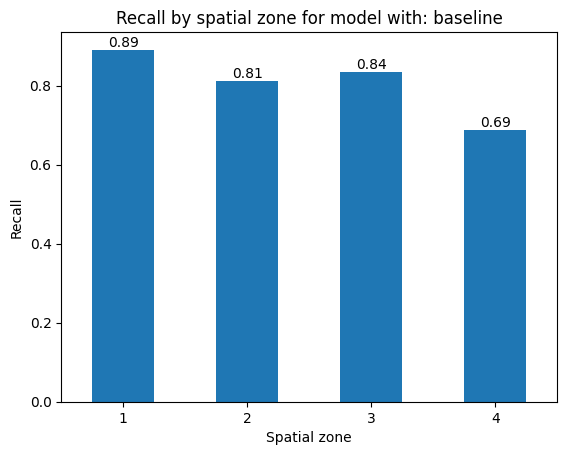

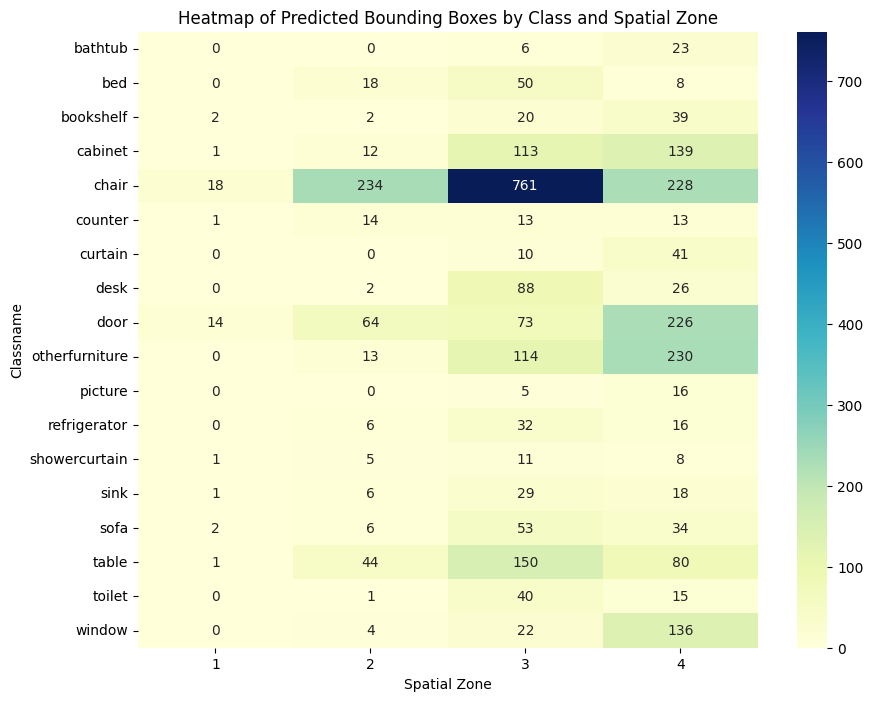

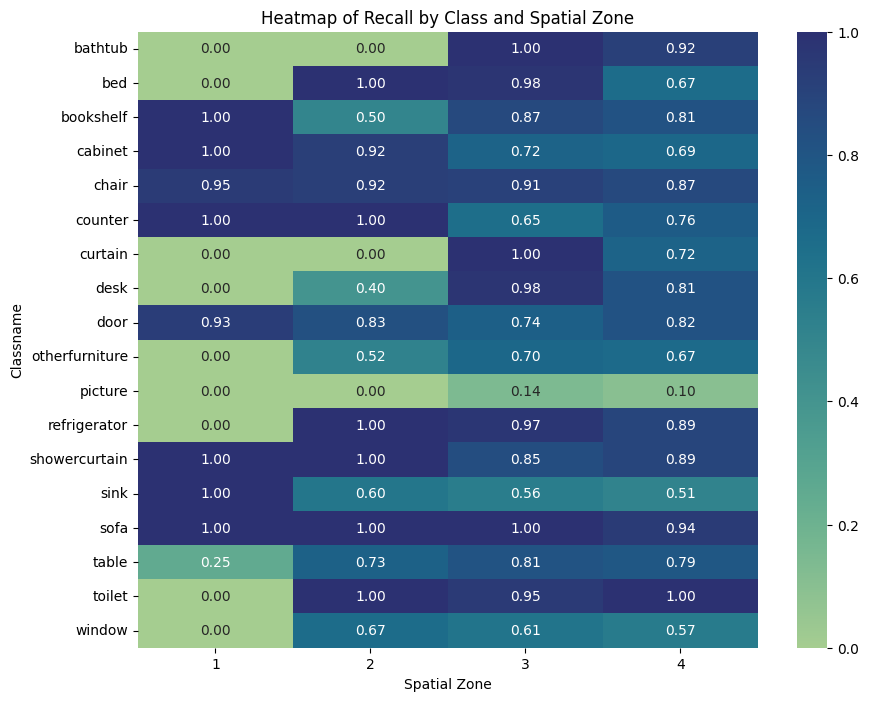

In [1]:
analyze_spatial_bias_df("gt_df_results_2024-09-19 22:33:27.016658_18classes_baseline_spatialzones.csv")

## Model with SELA Loss only:

Index(['img_id', 'scan_name', 'classname', 'gt_bbox_index', 'pred_bbox_index',
       'spatial_zone', 'has_pred_bbox'],
      dtype='object')
Number of rows with a predicted bounding box: 3342


has_pred_bbox,False,True,recall
spatial_zone,,,
1,9,37,0.804348
2,102,429,0.807910
3,313,1589,0.835436
4,598,1287,0.682759


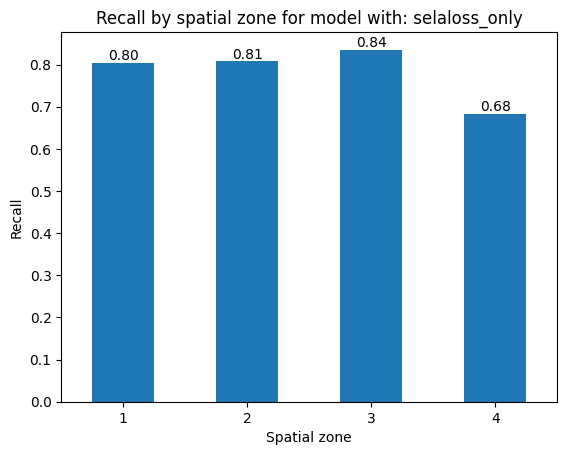

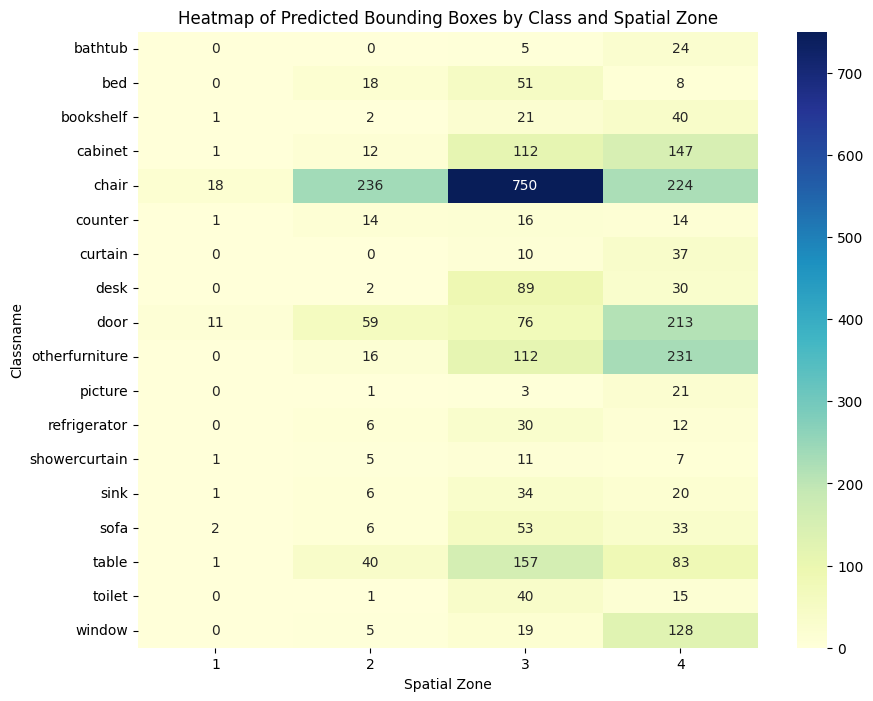

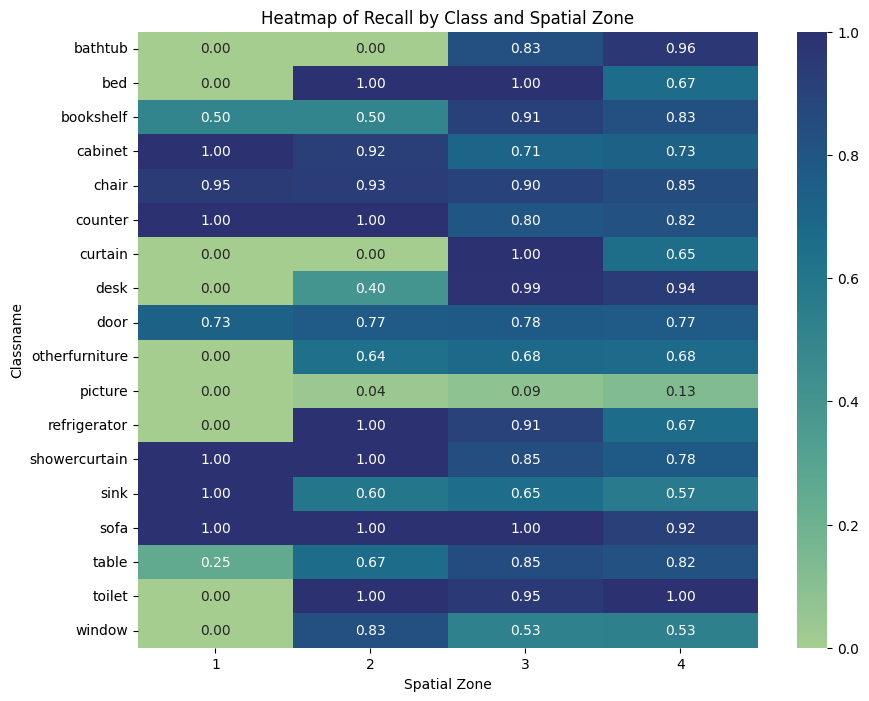

In [2]:
analyze_spatial_bias_df("gt_df_results_2024-09-19 22:37:35.519839_18classes_selaloss_only_spatialzones.csv")

## Model with Dynamic NMS only, with gamma=1

Index(['img_id', 'scan_name', 'classname', 'gt_bbox_index', 'pred_bbox_index',
       'spatial_zone', 'has_pred_bbox'],
      dtype='object')
Number of rows with a predicted bounding box: 3342


has_pred_bbox,False,True,recall
spatial_zone,,,
1,8,38,0.826087
2,97,434,0.817326
3,333,1569,0.824921
4,584,1301,0.690186


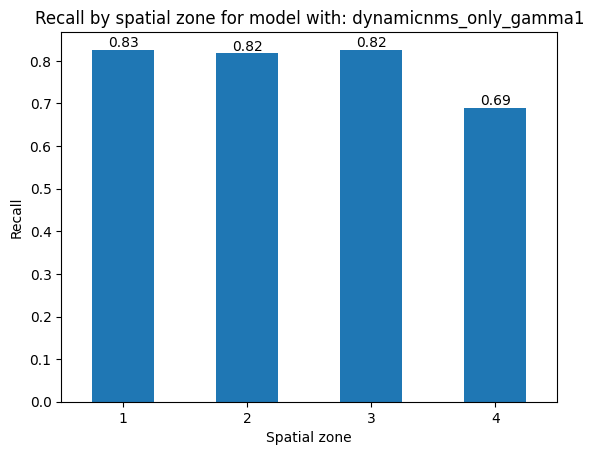

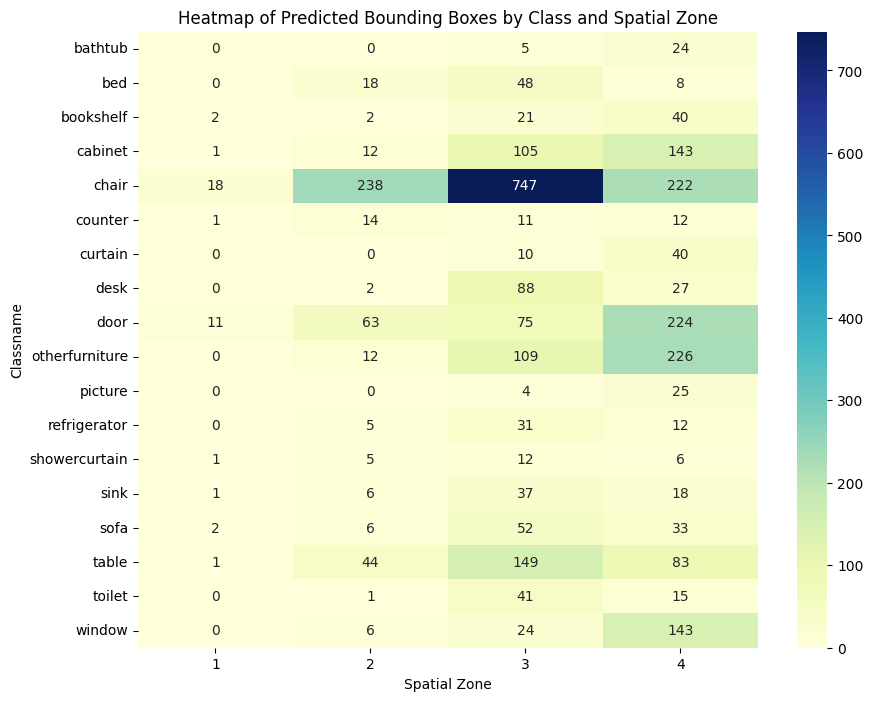

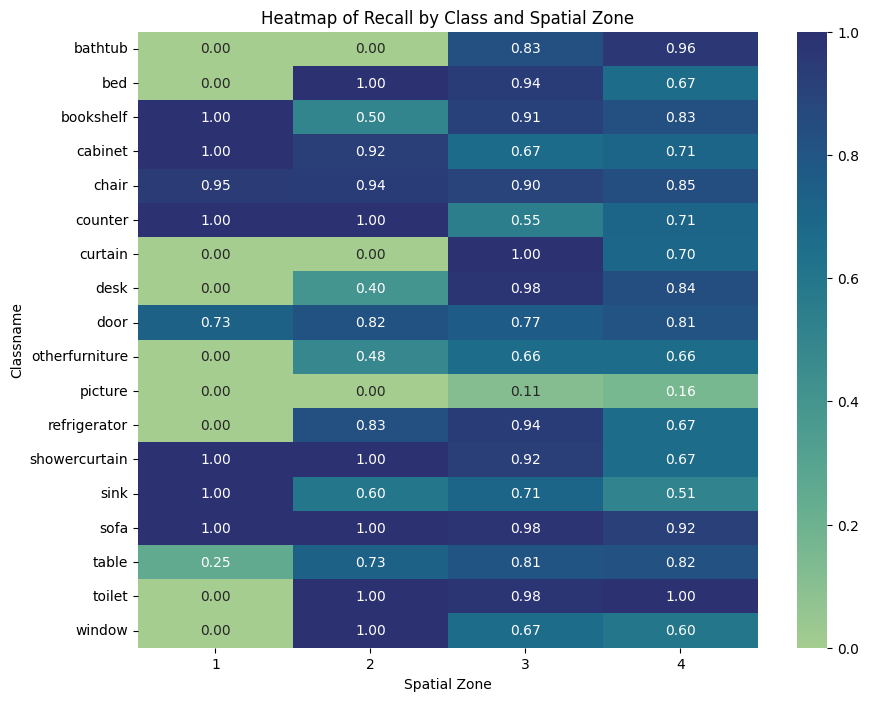

In [3]:
analyze_spatial_bias_df("gt_df_results_2024-09-19 22:39:20.640061_18classes_dynamicnms_only_gamma1_spatialzones.csv")

## Model with Dynamic NMS only, with gamma=0.4

Index(['img_id', 'scan_name', 'classname', 'gt_bbox_index', 'pred_bbox_index',
       'spatial_zone', 'has_pred_bbox'],
      dtype='object')
Number of rows with a predicted bounding box: 3349


has_pred_bbox,False,True,recall
spatial_zone,,,
1,9,37,0.804348
2,98,433,0.815443
3,335,1567,0.823870
4,573,1312,0.696021


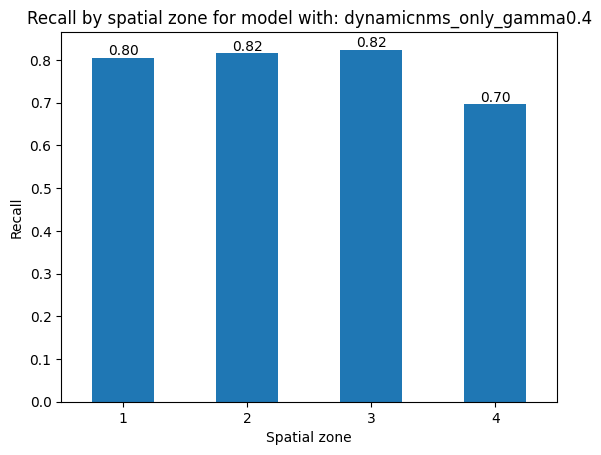

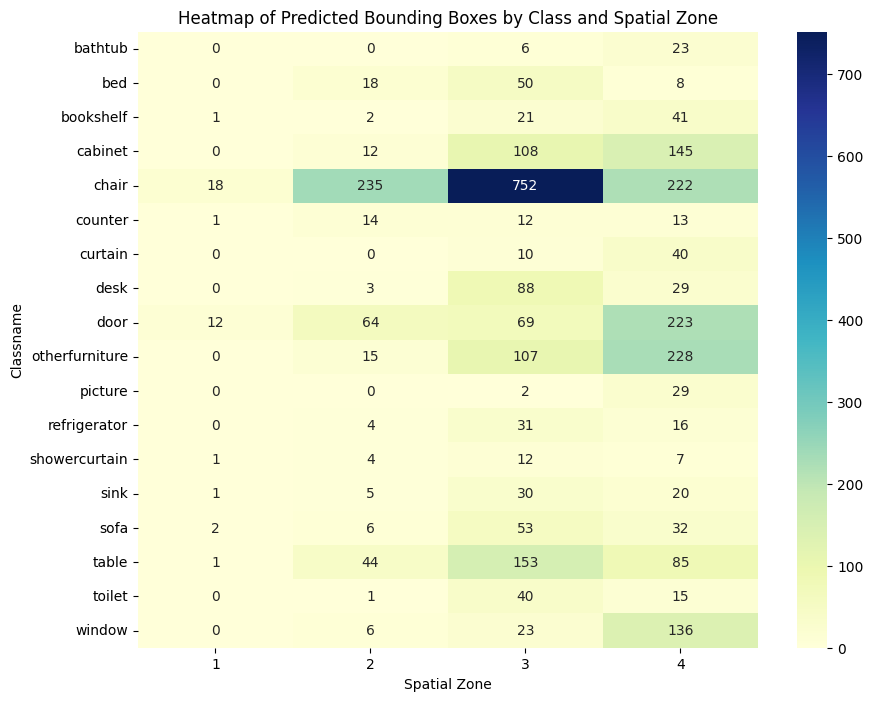

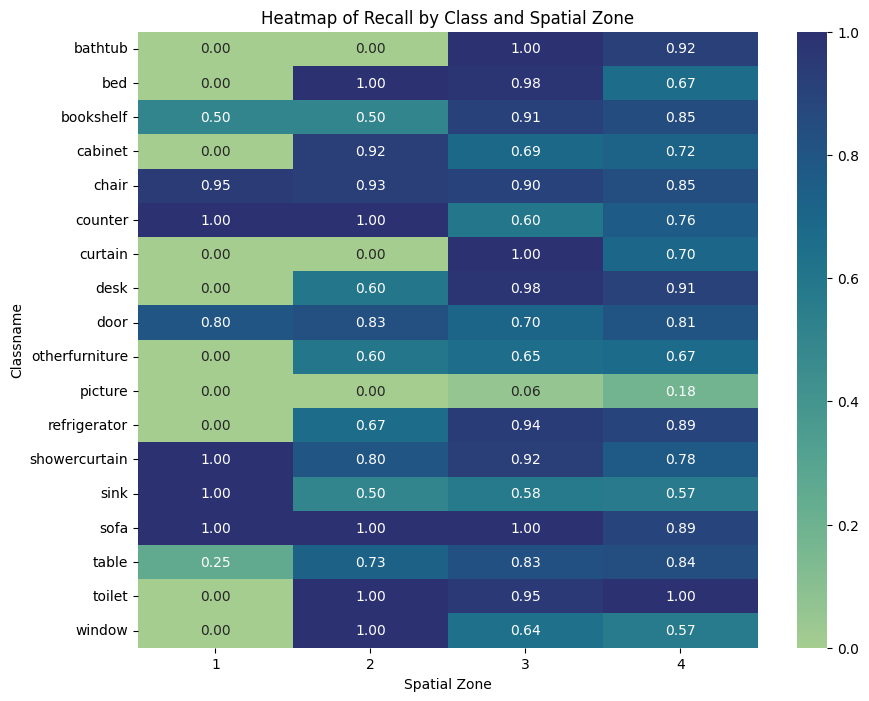

In [5]:
analyze_spatial_bias_df("gt_df_results_2024-09-19 22:53:48.776649_18classes_dynamicnms_only_gamma0.4_spatialzones.csv")

## Model with Dynamic NMS only, with gamma=0.2

Index(['img_id', 'scan_name', 'classname', 'gt_bbox_index', 'pred_bbox_index',
       'spatial_zone', 'has_pred_bbox'],
      dtype='object')
Number of rows with a predicted bounding box: 3339


has_pred_bbox,False,True,recall
spatial_zone,,,
1,6,40,0.869565
2,97,434,0.817326
3,323,1579,0.830179
4,599,1286,0.682228


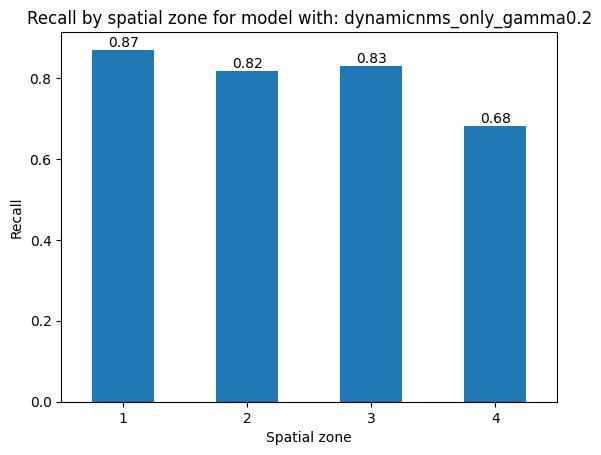

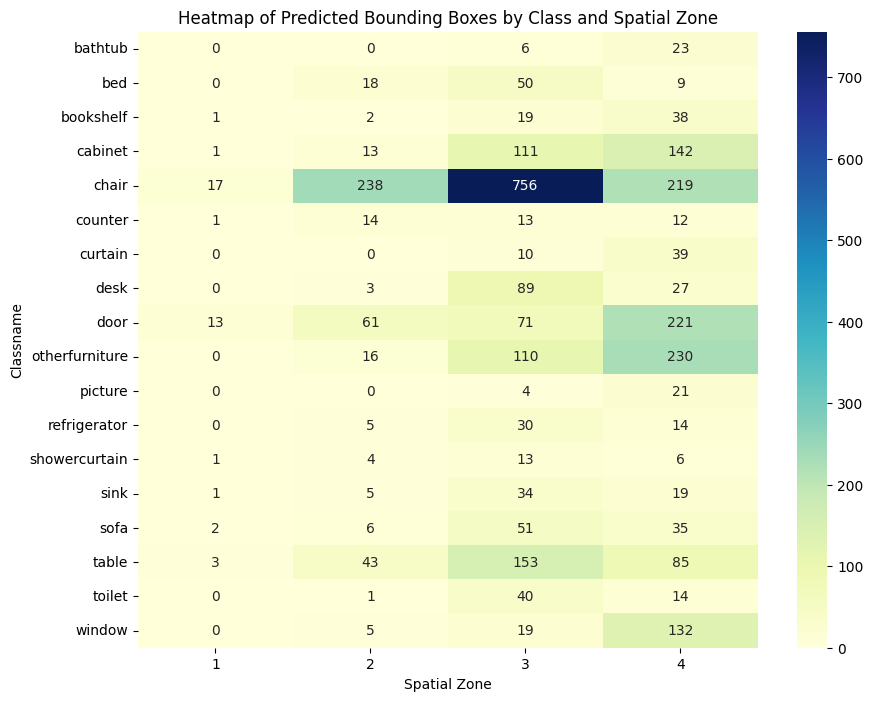

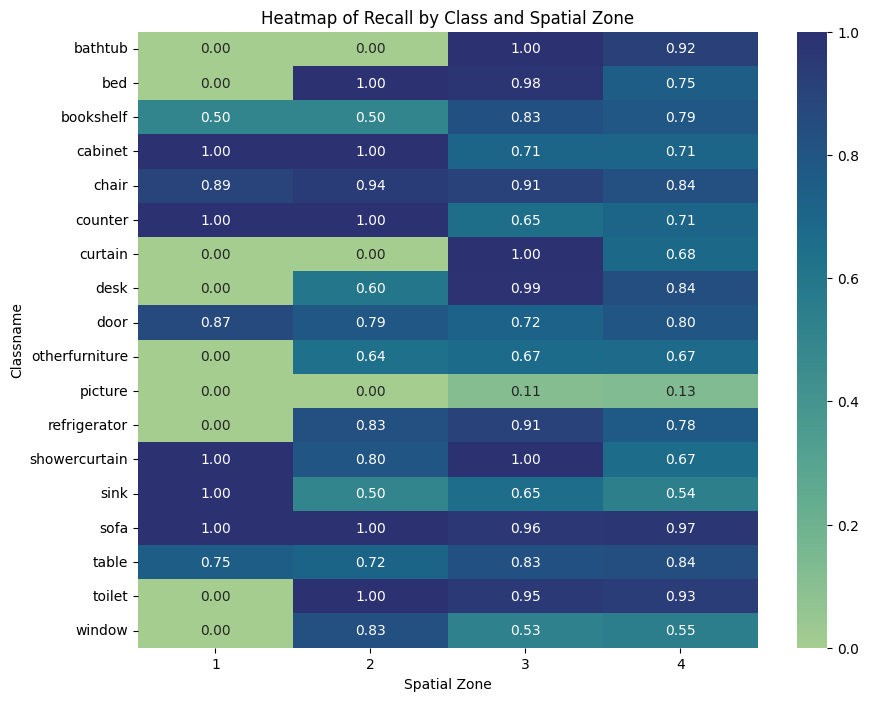

In [4]:
analyze_spatial_bias_df("gt_df_results_2024-09-19 22:57:13.486563_18classes_dynamicnms_only_gamma0.2_spatialzones.csv")

## Model with SELA Loss and Dynamic NMS, with gamma=0.05

Index(['img_id', 'scan_name', 'classname', 'gt_bbox_index', 'pred_bbox_index',
       'spatial_zone', 'has_pred_bbox'],
      dtype='object')
Number of rows with a predicted bounding box: 1741


has_pred_bbox,False,True,recall
spatial_zone,,,
1,26,20,0.434783
2,293,238,0.448211
3,956,946,0.497371
4,1348,537,0.284881


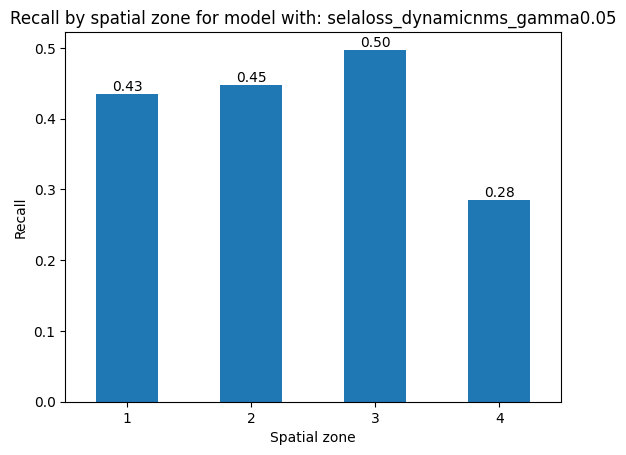

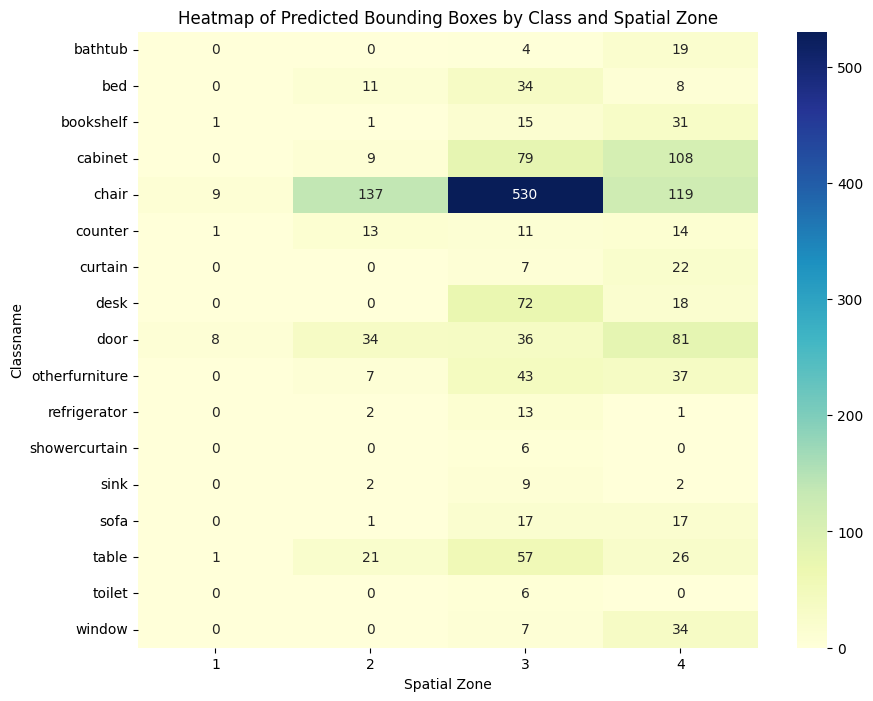

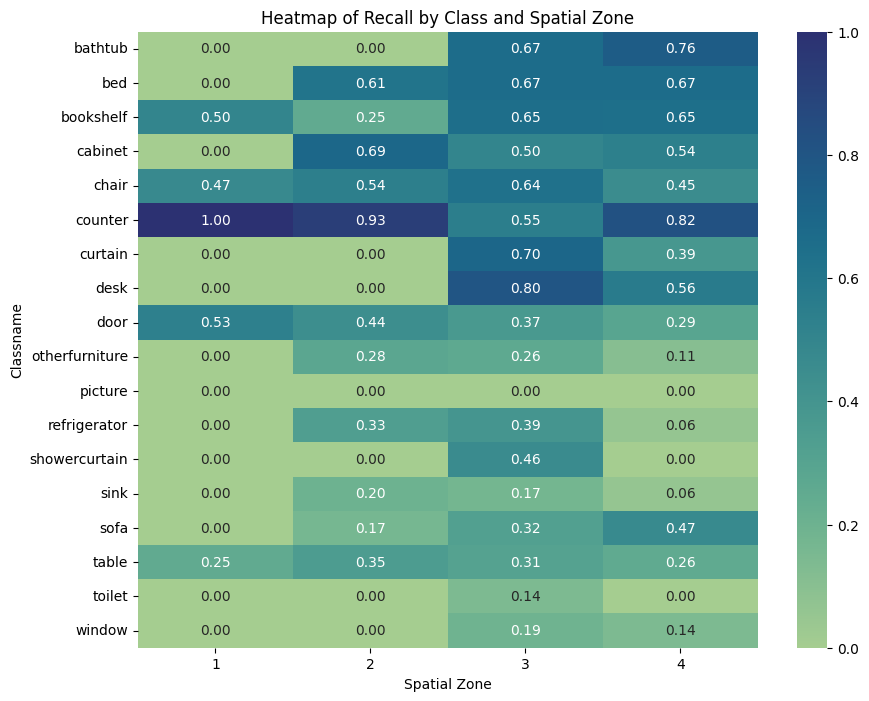

In [3]:
analyze_spatial_bias_df("gt_df_results_2024-09-19 22:46:08.075666_18classes_selaloss_dynamicnms_gamma0.05_spatialzones.csv")

## Model with SELA Loss and Dynamic NMS, with gamma=0.025

Index(['img_id', 'scan_name', 'classname', 'gt_bbox_index', 'pred_bbox_index',
       'spatial_zone', 'has_pred_bbox'],
      dtype='object')
Number of rows with a predicted bounding box: 1741


has_pred_bbox,False,True,recall
spatial_zone,,,
1,26,20,0.434783
2,293,238,0.448211
3,956,946,0.497371
4,1348,537,0.284881


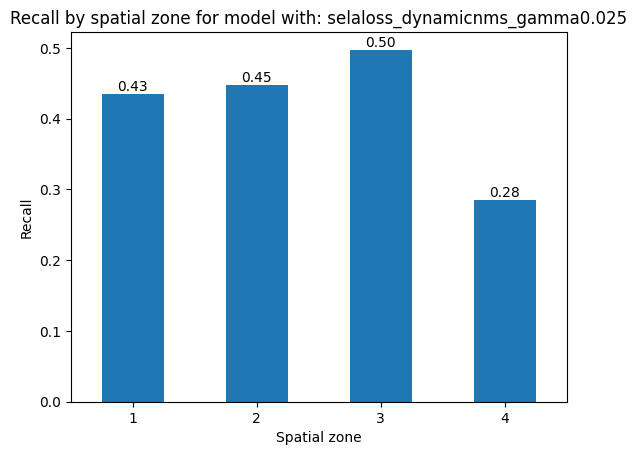

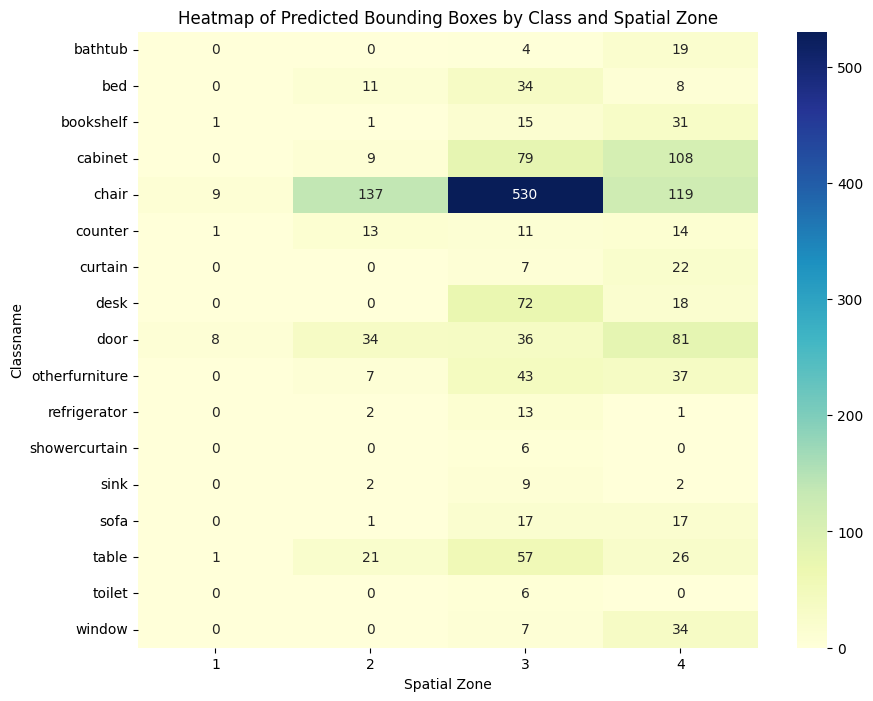

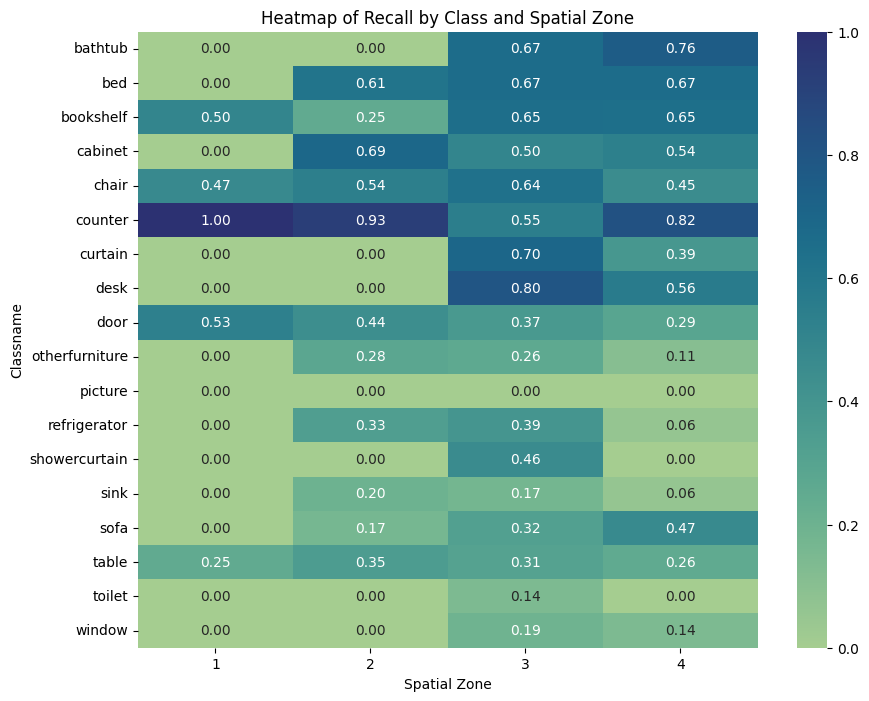

In [4]:
analyze_spatial_bias_df("gt_df_results_2024-09-19 22:48:19.117574_18classes_selaloss_dynamicnms_gamma0.025_spatialzones.csv")

# Spatial Zones-Performance Analysis for models with updated dynamic NMS:

Index(['img_id', 'scan_name', 'classname', 'gt_bbox_index', 'pred_bbox_index',
       'spatial_zone', 'has_pred_bbox'],
      dtype='object')
Number of rows with a predicted bounding box: 3346


has_pred_bbox,False,True,recall
spatial_zone,,,
1,9,36,0.800000
2,92,441,0.827392
3,343,1560,0.819758
4,574,1309,0.695167


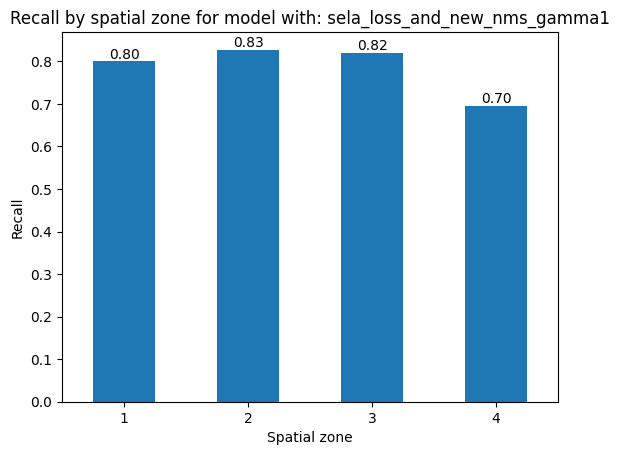

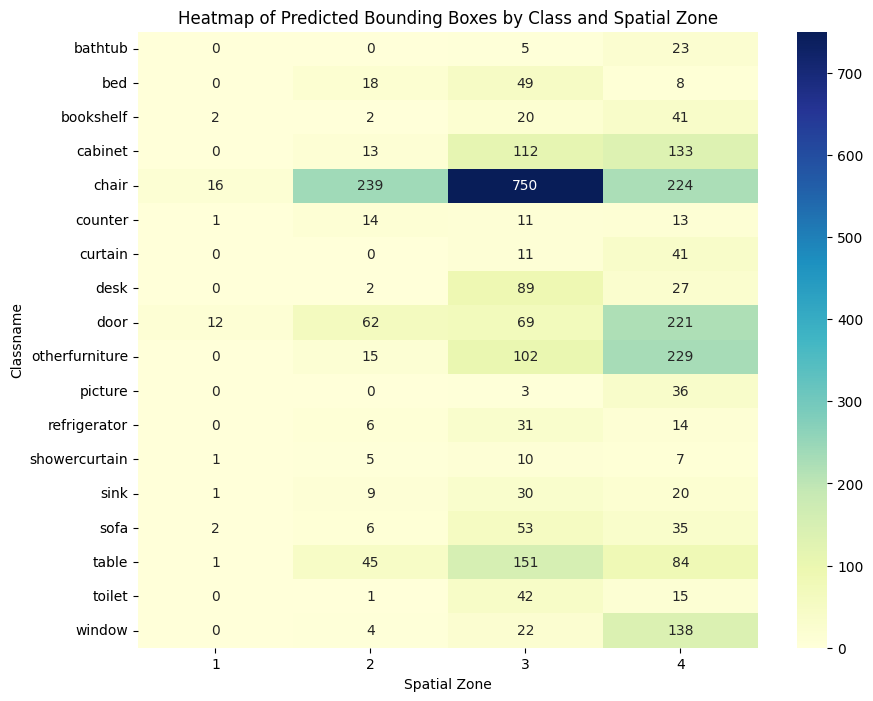

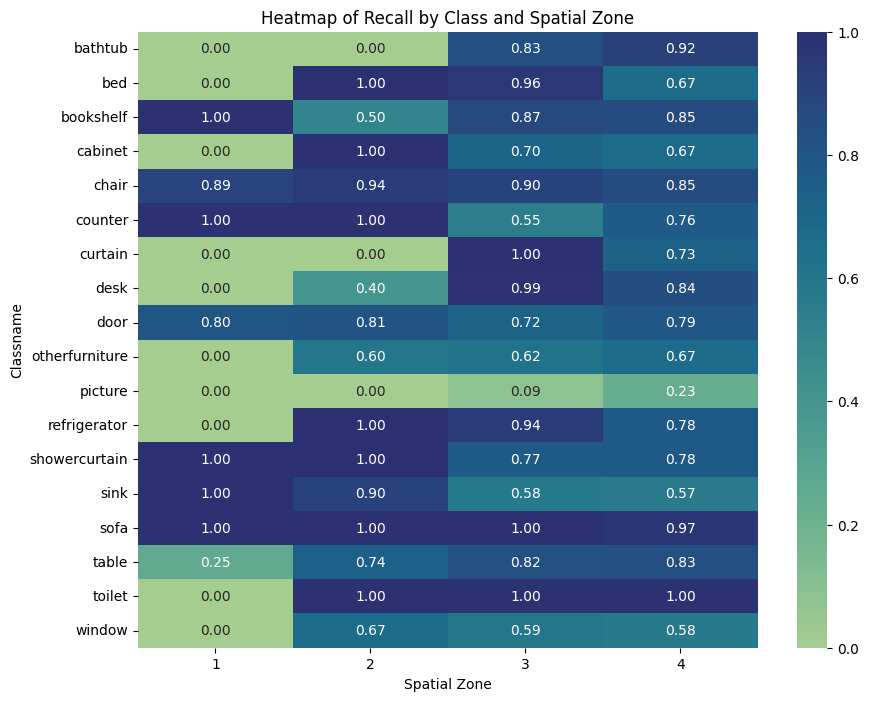

In [3]:
analyze_spatial_bias_df("gt_df_results_2024-09-21 14:30:29.017989_18classes_sela_loss_and_new_nms_gamma1_spatialzones.csv")

Index(['img_id', 'scan_name', 'classname', 'gt_bbox_index', 'pred_bbox_index',
       'spatial_zone', 'has_pred_bbox'],
      dtype='object')
Number of rows with a predicted bounding box: 3310


has_pred_bbox,False,True,recall
spatial_zone,,,
1,9,37,0.804348
2,104,431,0.805607
3,348,1555,0.817131
4,593,1287,0.684574


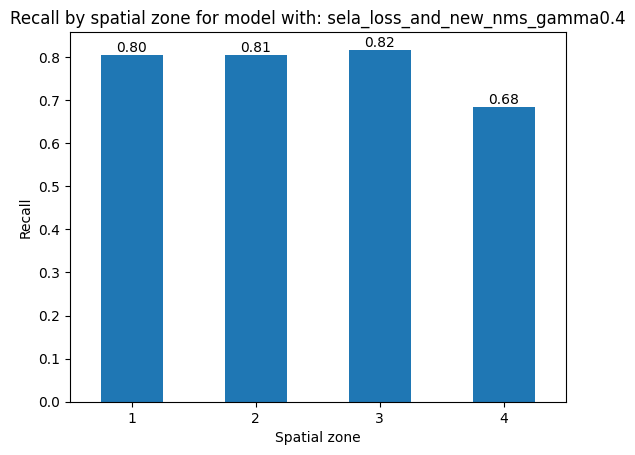

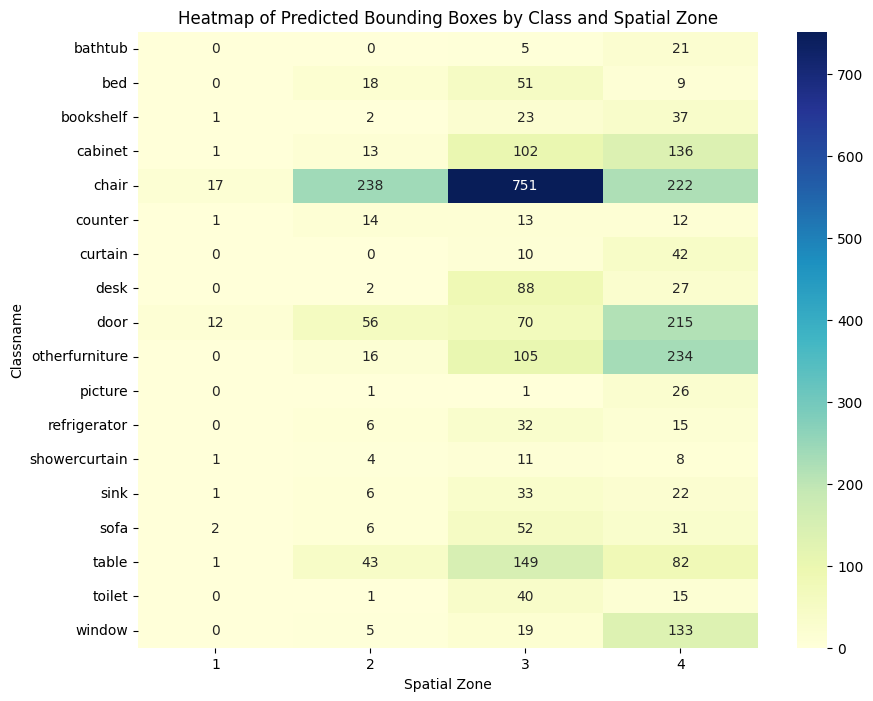

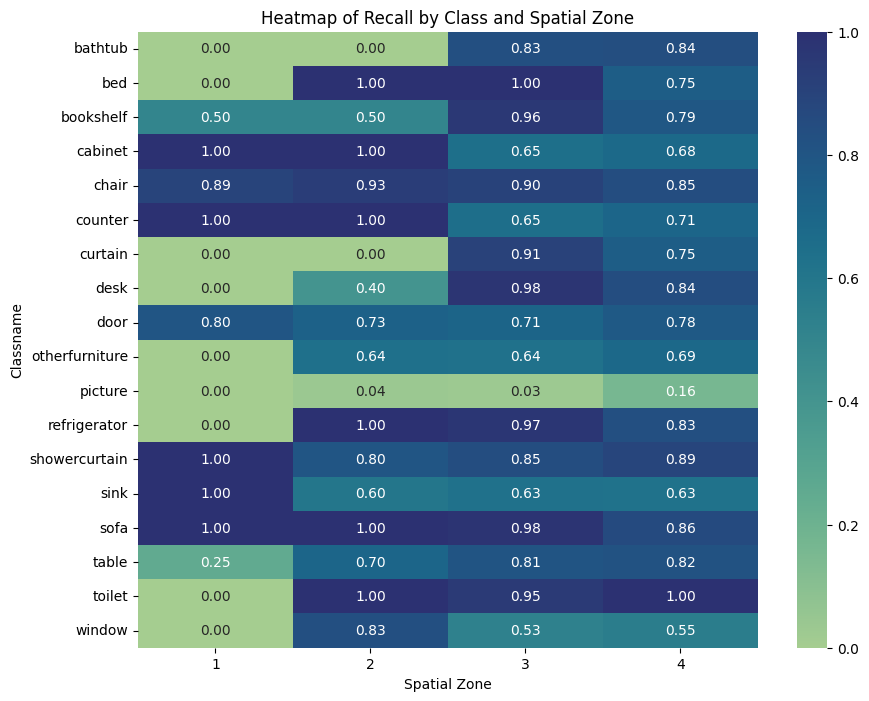

In [4]:
analyze_spatial_bias_df("gt_df_results_2024-09-21 12:04:54.044126_18classes_sela_loss_and_new_nms_gamma0.4_spatialzones.csv")

Index(['img_id', 'scan_name', 'classname', 'gt_bbox_index', 'pred_bbox_index',
       'spatial_zone', 'has_pred_bbox'],
      dtype='object')
Number of rows with a predicted bounding box: 3366


has_pred_bbox,False,True,recall
spatial_zone,,,
1,7,39,0.847826
2,93,438,0.824859
3,327,1577,0.828256
4,571,1312,0.696760


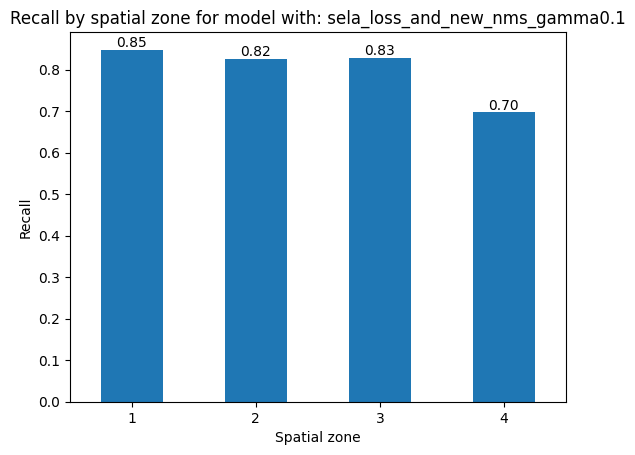

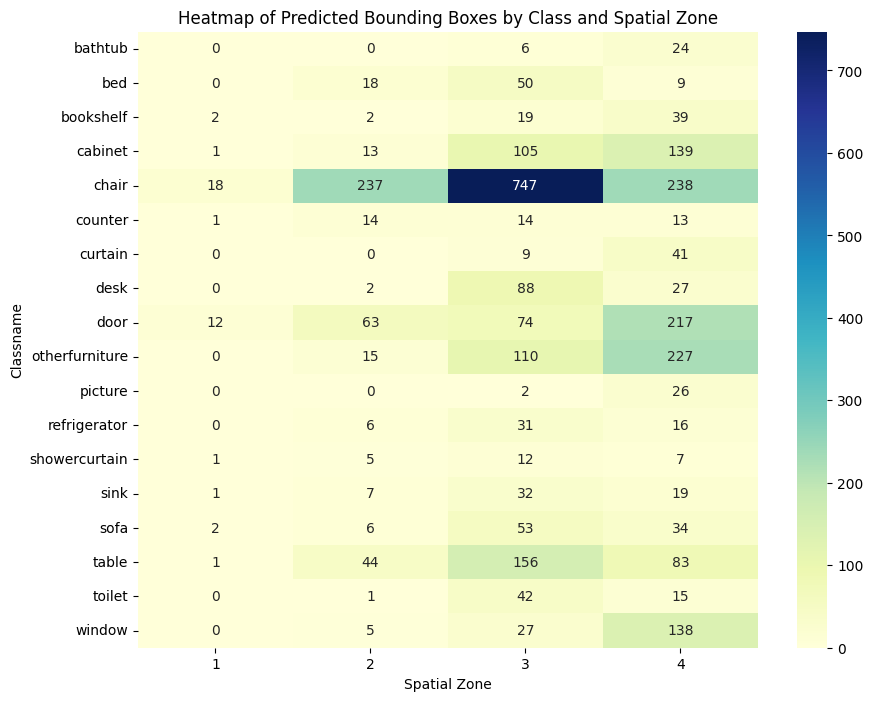

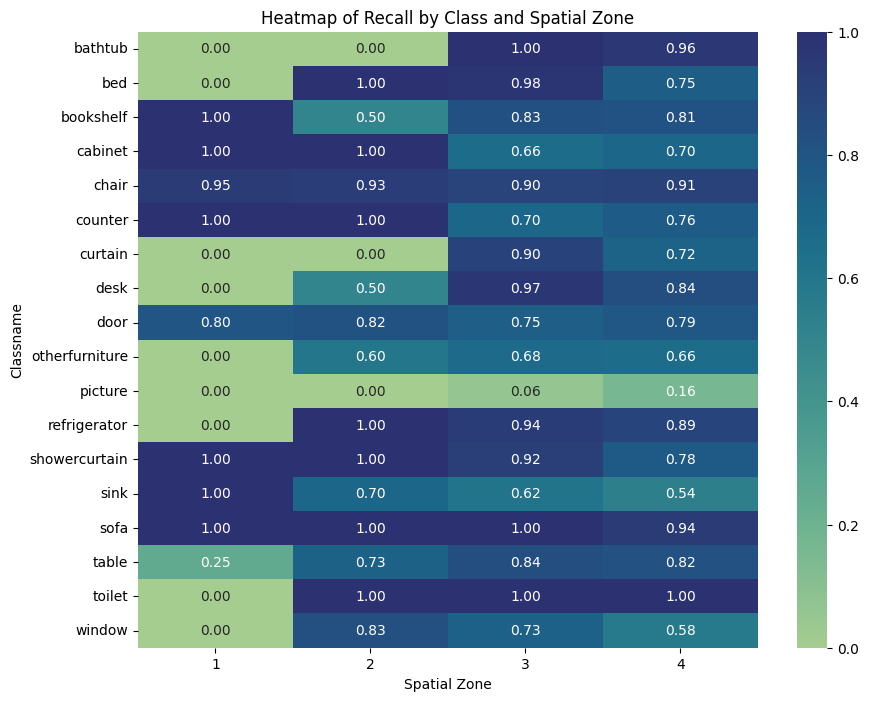

In [5]:
analyze_spatial_bias_df("gt_df_results_2024-09-23 14:34:34.219040_18classes_sela_loss_and_new_nms_gamma0.1_spatialzones.csv")

## Plot overall eval mAP results:

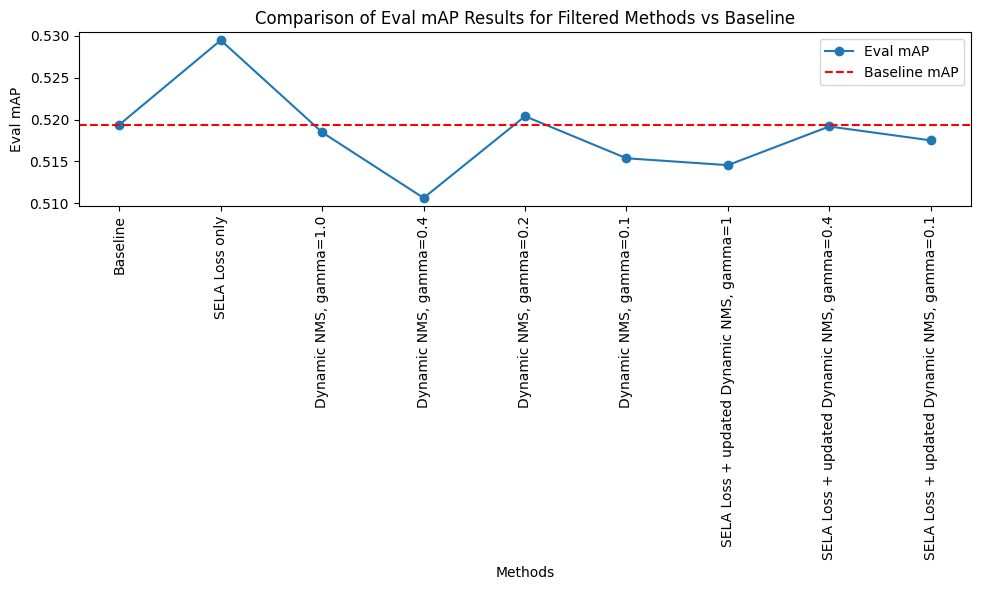

In [2]:
import matplotlib.pyplot as plt

# Remove the 3 anomalous data points (Dynamic NMS, gamma=0.05 and SELA Loss + Dynamic NMS, gamma=0.05, gamma=0.025)
methods_filtered = [
    "Baseline",
    "SELA Loss only",
    "Dynamic NMS, gamma=1.0",
    "Dynamic NMS, gamma=0.4",
    "Dynamic NMS, gamma=0.2",
    "Dynamic NMS, gamma=0.1",
    "SELA Loss + updated Dynamic NMS, gamma=1",
    "SELA Loss + updated Dynamic NMS, gamma=0.4",
    "SELA Loss + updated Dynamic NMS, gamma=0.1"
]

mAP_results_filtered = [
    0.519386,
    0.529473,
    0.518467,
    0.510631,
    0.520394,
    0.515374,
    0.514550,
    0.519171,
    0.517511
]

baseline = 0.519386

# Plotting the filtered results
plt.figure(figsize=(10, 6))
plt.plot(methods_filtered, mAP_results_filtered, marker='o', label='Eval mAP')
plt.axhline(y=baseline, color='r', linestyle='--', label='Baseline mAP')

# Adding titles and labels
plt.title("Comparison of Eval mAP Results for Filtered Methods vs Baseline")
plt.xlabel("Methods")
plt.ylabel("Eval mAP")
plt.xticks(rotation=90)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()